In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [46]:
df = pd.read_csv('titanic_toy.csv')

In [48]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [52]:
df.isnull().sum()/len(df) *100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

# Mean-Median-Imputation

## Using Pandas

In [55]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [61]:
median_age = X_train['Age'].median()
mean_age = X_train['Age'].mean()
median_fare = X_train['Fare'].median()
mean_fare = X_train['Fare'].mean()

In [65]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [70]:

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


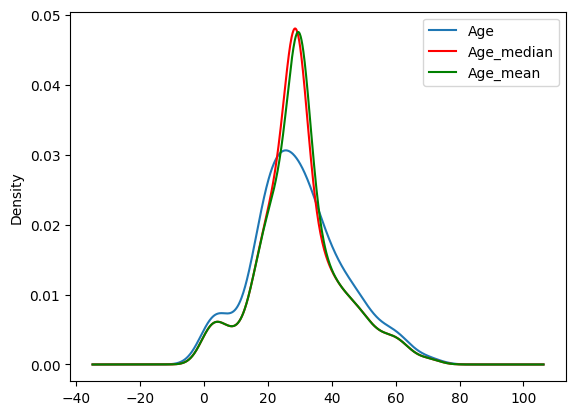

In [107]:
fig = plt.figure()
ax = plt.subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)
X_train['Age_median'].plot(kind='kde', color='red', ax=ax)
X_train['Age_mean'].plot(kind='kde', color='green', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

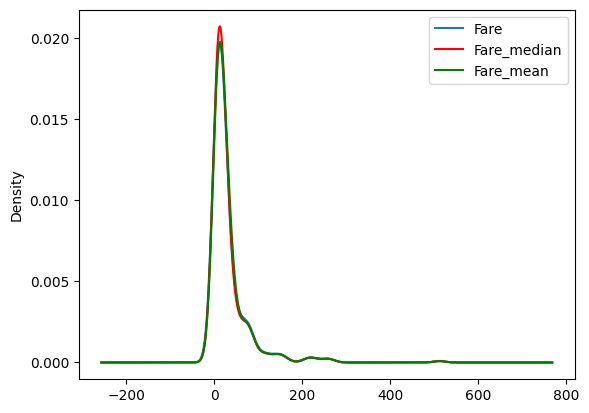

In [109]:
fig = plt.figure()
ax = plt.subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)
X_train['Fare_median'].plot(kind='kde', color='red', ax=ax)
X_train['Fare_mean'].plot(kind='kde', color='green', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [111]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [117]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

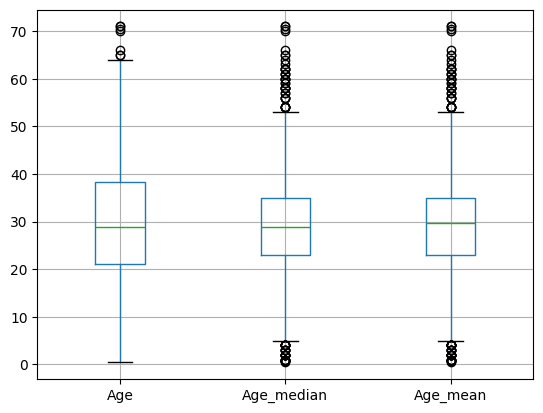

In [119]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

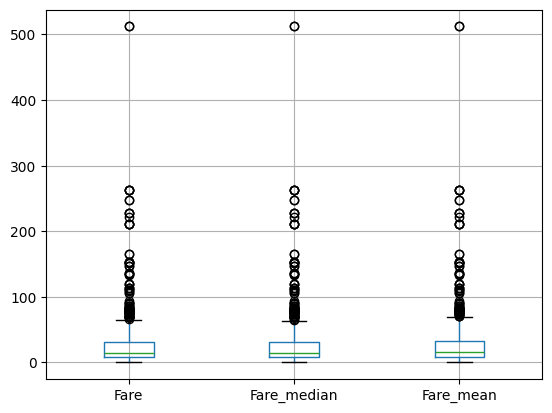

In [121]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

## Using scikit-learn simple imputer

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [144]:
imputer2 = SimpleImputer(strategy='mean')
imputer1 = SimpleImputer(strategy='median')

In [146]:
trf = ColumnTransformer(transformers=[
    ('age_impute', imputer1, ['Age']), 
    ('fare_impute', imputer2, ['Fare'])
], remainder='passthrough')

In [148]:
trf.fit(X_train)

C:\Users\sudha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('age_impute', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('fare_impute', SimpleImputer(), ['Fare'])])

In [150]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

# Arbitary Value Imputation

In [154]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [158]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_-1'] = X_train['Age'].fillna(-1)
X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_-1'] = X_train['Fare'].fillna(-1)

In [160]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_99'].var())
print('Age Variance after mean imputation: ', X_train['Age_-1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_999'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_-1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  951.7275570187188
Age Variance after mean imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  47219.202652176304
Fare Variance after mean imputation:  2378.5676784883494


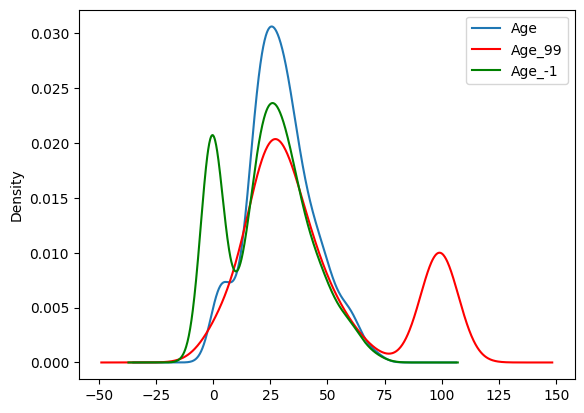

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

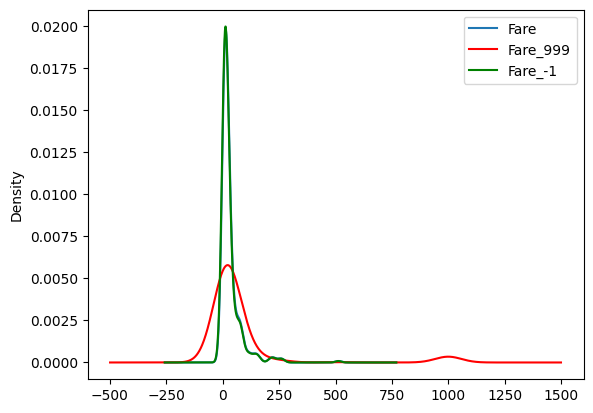

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')